# Fixed-Targets Comparison

Compares genetic-algorithm accuracy vs. number of sensor nodes
for N=500, N=5000, and N=50000, all at the same average connectivity <K>
(gamma=1.8, N=5000 reference), with 50 drug targets per drug
and feature sizes [1, 4, 16, 64, 256].

## Config

In [16]:
import pathlib

# Paths to the ga-results/ directories for each N.
# Each directory contains one CSV per network: 0.csv, 1.csv, ..., 49.csv
# Columns: original_network_idx, max_num_features, accuracy, features
GA_RESULTS = {
  500:   pathlib.Path('../../data/drug-fixed-targets/N500/ga-results'),
  5000:   pathlib.Path('../../data/drug-fixed-targets/N5000/ga-results'),
  # 5000:  pathlib.Path('../../data/random-forests/retention-vs-accuracy-v0129d-N5k-gamma1.8-10drugs-genetic-shard/'),  # existing results
  50000: pathlib.Path('../../data/drug-fixed-targets/N50000/ga-results'),
}

PLOT_OUT = pathlib.Path('../../plots/fixed-targets-ga-accuracy-vs-features.png')

## Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['text.usetex'] = False

## Load GA results

In [18]:
dfs = []
for N, results_dir in GA_RESULTS.items():
  csvs = sorted(results_dir.glob('*.csv'))
  if not csvs:
    print(f'WARNING: no CSVs found in {results_dir}')
    continue
  df = pd.concat([pd.read_csv(f) for f in csvs], ignore_index=True)
  df['N'] = N
  dfs.append(df)
  print(f'N={N}: {len(csvs)} network files, {len(df)} rows')

all_df = pd.concat(dfs, ignore_index=True)
all_df['N'] = all_df['N']#.astype(str)
all_df.head()

N=500: 50 network files, 250 rows
N=5000: 50 network files, 250 rows
N=50000: 48 network files, 240 rows


,original_network_idx,max_num_features,accuracy,features,N
0,0,1,0.181818,{'node-171'},500
1,0,4,0.727273,"{'node-493', 'node-229', 'node-294', 'node-399'}",500
2,0,16,1.000000,"{'node-417', 'node-49', 'node-61', 'node-188',...",500
3,0,64,1.000000,"{'node-270', 'node-79', 'node-49', 'node-338',...",500
4,0,256,1.000000,"{'node-374', 'node-192', 'node-289', 'node-424...",500


## Plot: accuracy vs. number of sensor nodes

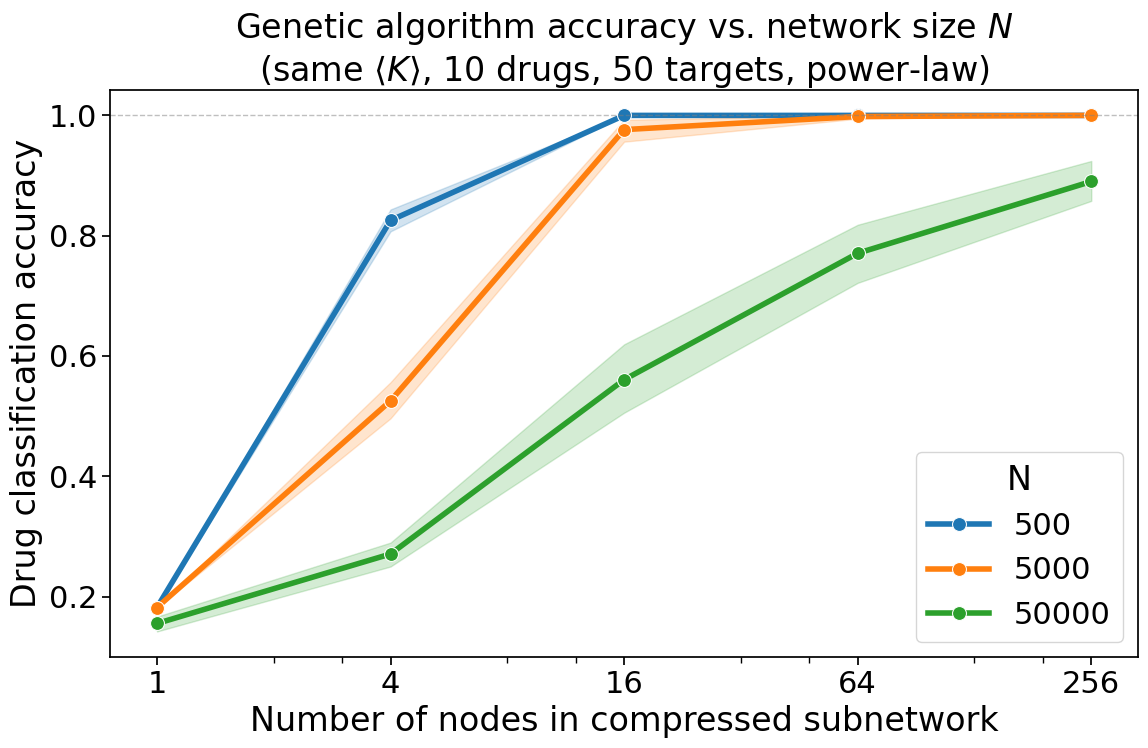

In [19]:
with sns.plotting_context('notebook', font_scale=2.0):
  fig, ax = plt.subplots(figsize=(12, 8))
  g = sns.lineplot(
    data=all_df,
    x='max_num_features',
    y='accuracy',
    hue='N',
    lw=4,
    marker='o',
    markersize=10,
    palette='tab10',
    ax=ax,
  )
  ax.set_xscale('log', base=4)
  ax.set_xticks([1, 4, 16, 64, 256])
  ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
  ax.axhline(1.0, color='gray', lw=1, ls='--', alpha=0.5)
  ax.axhline(0.1, color='gray', lw=1, ls=':', alpha=0.5, label='random (10 drugs)')
  g.set(
    xlabel='Number of nodes in compressed subnetwork',
    ylabel='Drug classification accuracy',
    title='Genetic algorithm accuracy vs. network size $N$\n(same $\\langle K \\rangle$, 10 drugs, 50 targets, power-law)',
  )
  plt.tight_layout()

In [ ]:
PLOT_OUT.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(PLOT_OUT, bbox_inches='tight', dpi=300)
print(f'saved to {PLOT_OUT}')

## Summary statistics

In [ ]:
summary = (
  all_df
  .groupby(['N', 'max_num_features'])['accuracy']
  .agg(['mean', 'std', 'count'])
  .rename(columns={'mean': 'mean_accuracy', 'std': 'std_accuracy', 'count': 'n_networks'})
  .reset_index()
)
summary['stderr'] = summary['std_accuracy'] / np.sqrt(summary['n_networks'])
summary